In [15]:
import os
import cv2
import math
import glob
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Image Reading and Preprocessing

In [16]:
folder_path = '/kaggle/input/datasets/jauhanahmad/gambar/img/'

imagefiles = glob.glob(os.path.join(folder_path, '*.jpeg'))

imagefiles.sort(key=lambda f: int(''.join(filter(str.isdigit, os.path.basename(f)))))

images = []
images_rgb = [] 

print(f"Ditemukan {len(imagefiles)} gambar:")
for f in imagefiles:
    print(f"- {f}")

for filename in imagefiles:
    img = cv2.imread(filename)
    
    if img is not None:
        images.append(img) 
        
        img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        images_rgb.append(img_rgb)
    else:
        print(f"Gagal membaca file: {filename}")

num_images = len(images)

Ditemukan 6 gambar:
- /kaggle/input/datasets/jauhanahmad/gambar/img/1.jpeg
- /kaggle/input/datasets/jauhanahmad/gambar/img/2.jpeg
- /kaggle/input/datasets/jauhanahmad/gambar/img/3.jpeg
- /kaggle/input/datasets/jauhanahmad/gambar/img/4.jpeg
- /kaggle/input/datasets/jauhanahmad/gambar/img/5.jpeg
- /kaggle/input/datasets/jauhanahmad/gambar/img/6.jpeg


# Image Display

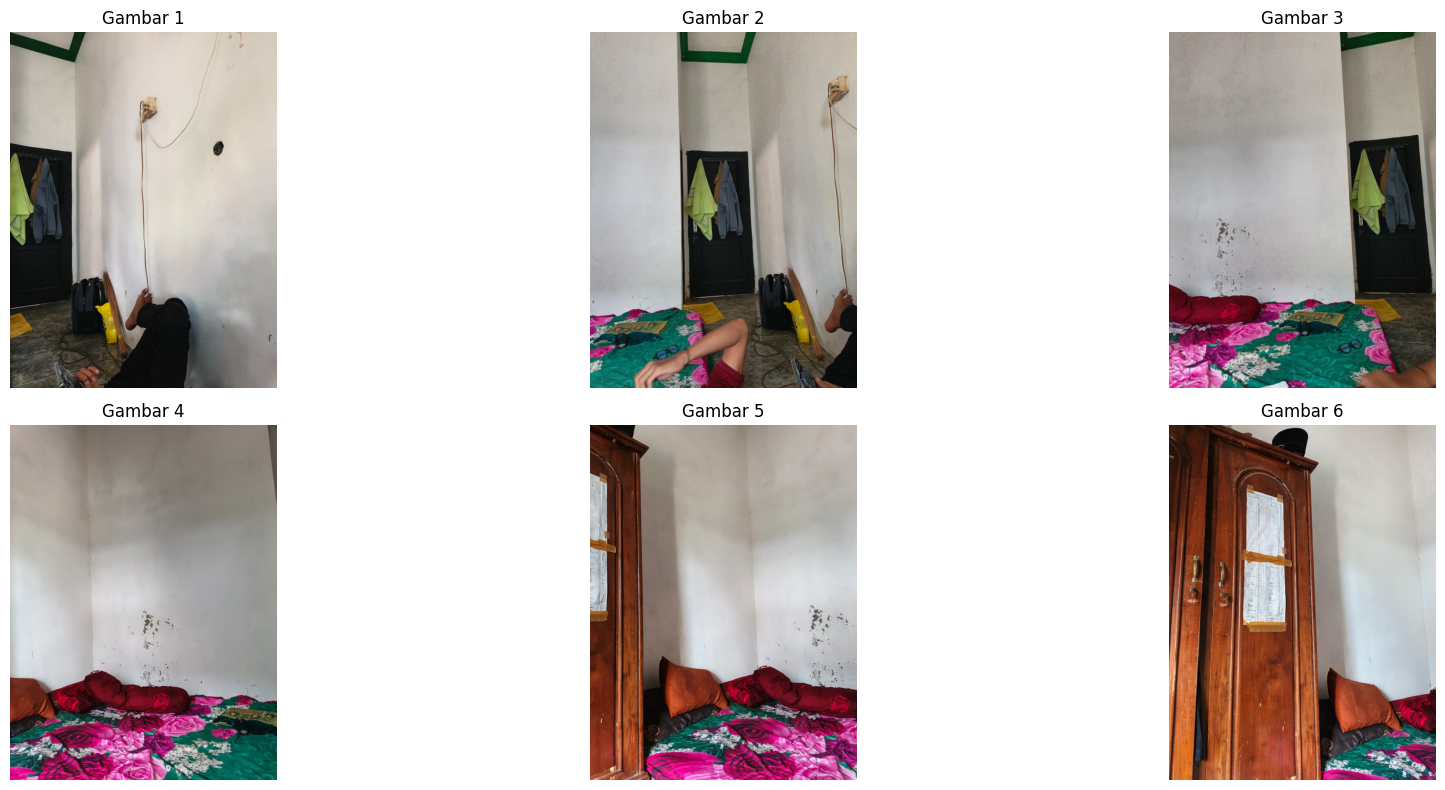

In [17]:
if num_images > 0:
    plt.figure(figsize=[20, 8])
    num_cols = 3
    num_rows = math.ceil(num_images / num_cols)
    
    for i in range(0, num_images):
        plt.subplot(num_rows, num_cols, i + 1)
        plt.axis("off")
        plt.imshow(images_rgb[i])
        plt.title(f"Gambar {i+1}")
        
    plt.tight_layout()
    plt.show()
else:
    print("Tidak ada gambar yang berhasil dimuat.")

# deteksi keypoints dan Feature matching

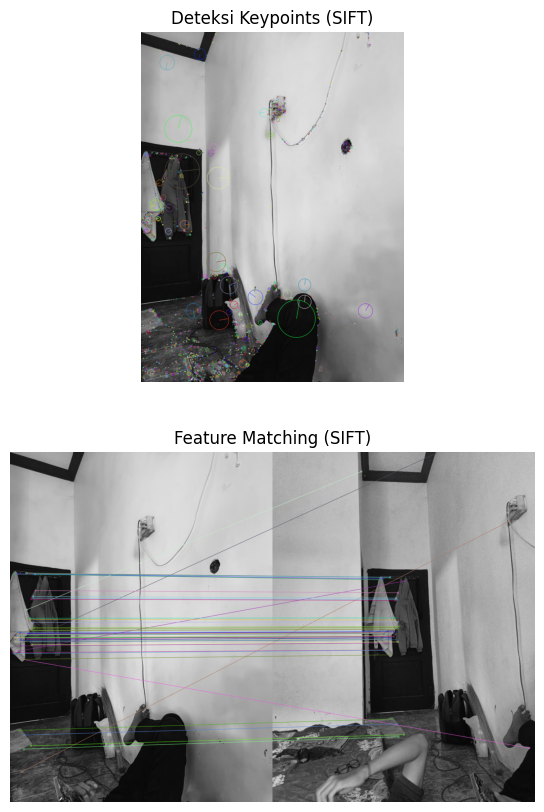

In [22]:
sift = cv2.SIFT_create()

img1 = images[0]
img2 = images[1]
gray1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
gray2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

kp1, des1 = sift.detectAndCompute(gray1, None)
kp2, des2 = sift.detectAndCompute(gray2, None)

img_keypoints = cv2.drawKeypoints(gray1, kp1, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
cv2.imwrite('keypoints.jpg', img_keypoints) 

bf = cv2.BFMatcher()
matches = bf.knnMatch(des1, des2, k=2)


good_matches = []
for m, n in matches:
    if m.distance < 0.75 * n.distance:
        good_matches.append([m])


img_matches = cv2.drawMatchesKnn(gray1, kp1, gray2, kp2, good_matches[:50], None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
cv2.imwrite('matches.jpg', img_matches) # Simpan untuk laporan


plt.figure(figsize=(15, 10))
plt.subplot(2,1,1)
plt.imshow(img_keypoints)
plt.title("Deteksi Keypoints (SIFT)")
plt.axis('off')

plt.subplot(2,1,2)
plt.imshow(img_matches)
plt.title("Feature Matching (SIFT)")
plt.axis('off')
plt.show()

# Image Stitching

Sedang memproses stitching (ini mungkin memakan waktu)...
Panorama BERHASIL dibuat!


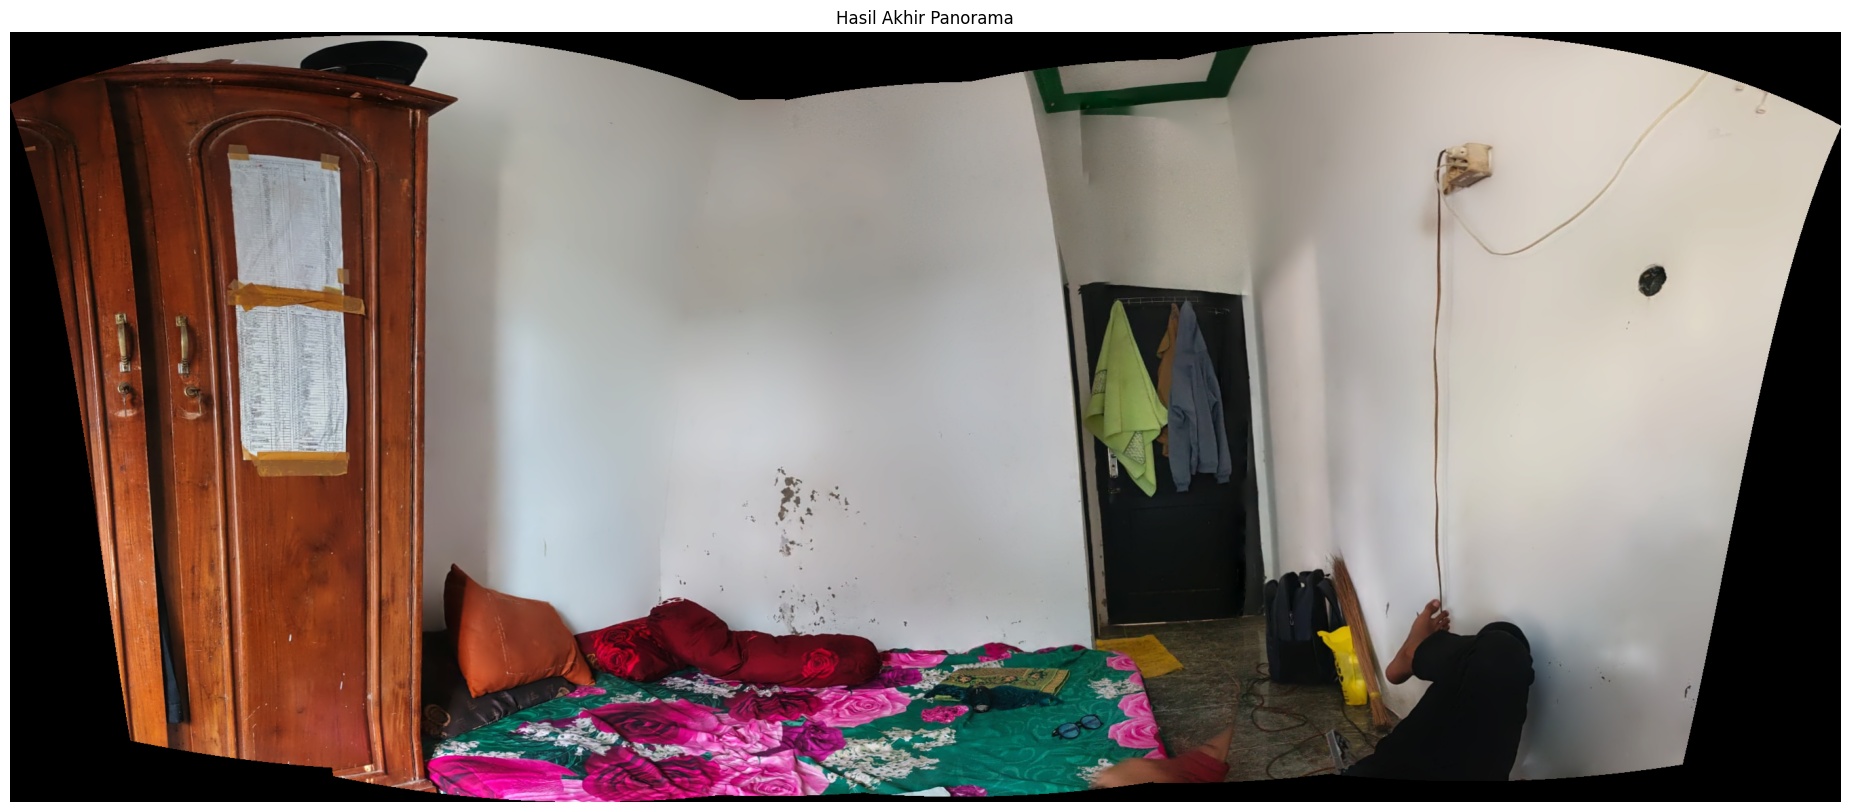

In [18]:
if num_images > 1:
    print("Sedang memproses stitching (ini mungkin memakan waktu)...")
    stitcher = cv2.Stitcher_create() 
    status, result = stitcher.stitch(images)
    if status == cv2.Stitcher_OK:
        print("Panorama BERHASIL dibuat!")
        
        result_rgb = cv2.cvtColor(result, cv2.COLOR_BGR2RGB)
        
        plt.figure(figsize=[30, 10])
        plt.imshow(result_rgb)
        plt.axis("off")
        plt.title("Hasil Akhir Panorama")
        plt.show()
    else:
        error_map = {
            1: "ERR_NEED_MORE_IMGS (Perlu lebih banyak gambar)",
            2: "ERR_HOMOGRAPHY_EST_FAIL (Gagal menyamakan perspektif/kurang overlap)",
            3: "ERR_CAMERA_PARAMS_ADJUST_FAIL (Gagal menyesuaikan parameter kamera)"
        }
        print(f"Stitching GAGAL. Status: {status}")
        print(f"Penyebab: {error_map.get(status, 'Unknown Error')}")
else:
    print("Jumlah gambar kurang untuk membuat panorama (minimal 2).")